<a href="https://colab.research.google.com/github/dmaresza/tensorflow_course/blob/main/01_TensorFlow_Neural_Network_Regression_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural network regression with TensorFlow Exercises

In [27]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build a model to fit to it.

In [79]:
# Creating 100-element straight line dataset
weight = 3
bias = 9

X = tf.range(-100, 100, 2)
y = weight * X + bias

In [80]:
# Dividing the data into train and test splits
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

In [81]:
# Creating function to visualize data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  '''
  Plots training data, test data, and compares predictions.
  '''
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Plot predictions if they exist
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

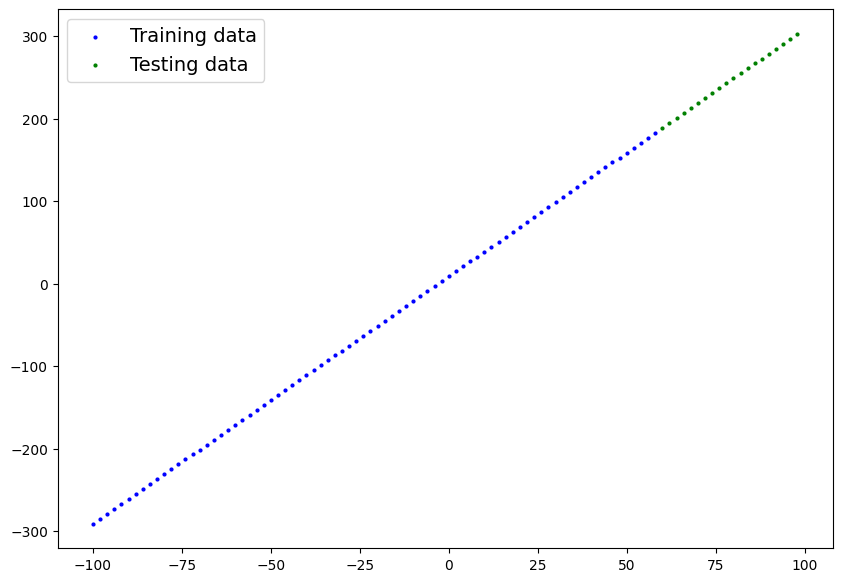

In [82]:
plot_predictions()

In [89]:
# Creating and training a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 60.0753 - mae: 60.0753
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 13.4249 - mae: 13.4249
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 10.9498 - mae: 10.9498
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 9.2725 - mae: 9.2725
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 10.9173 - mae: 10.9173
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 9.3741 - mae: 9.3741
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 9.2968 - mae: 9.2968
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 11.8221 - mae: 11.8221
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 10.3977 - mae: 10.3977
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 11.0507 - mae: 11.0507
Epoch 11/100
3/3 [==============================] - 0s 6ms/step -

In [90]:
# Predicting on the test data
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


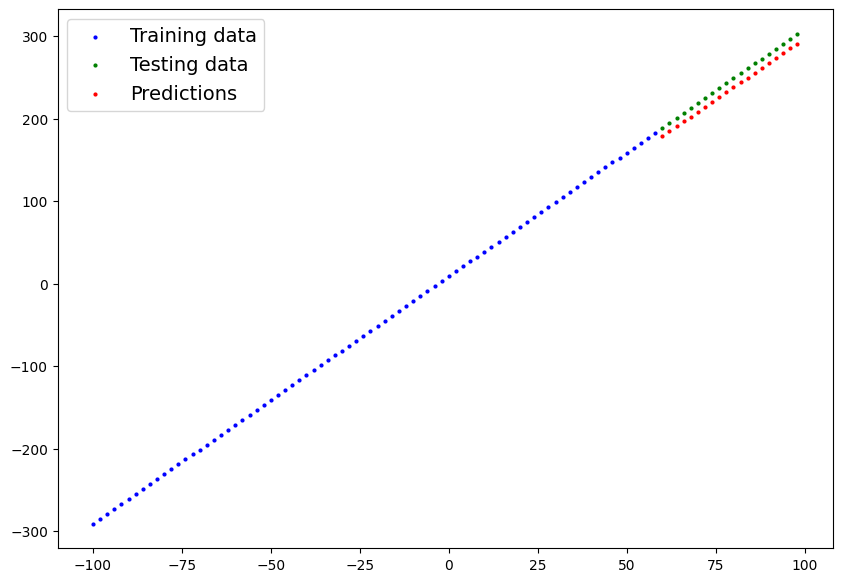

In [91]:
# Visualizing predictions on test data
plot_predictions(predictions=y_pred)

A very simple model of one dense layer with one hidden unit seems to be able to fit the data pretty well.

### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset. How does it perform?

In [101]:
# Building and training a model with 4 Dense layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 141.3140 - mae: 141.3140
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 191.0674 - mae: 191.0674
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 292.1886 - mae: 292.1886
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0726 - mae: 126.0726
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0697 - mae: 126.0697
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 126.0674 - mae: 126.0674
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0651 - mae: 126.0651
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0623 - mae: 126.0623
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0595 - mae: 126.0595
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 126.0565 - mae: 126.0565
Epoch 11/100
3/3 [=====================

1/1 [==============================] - 0s 71ms/step


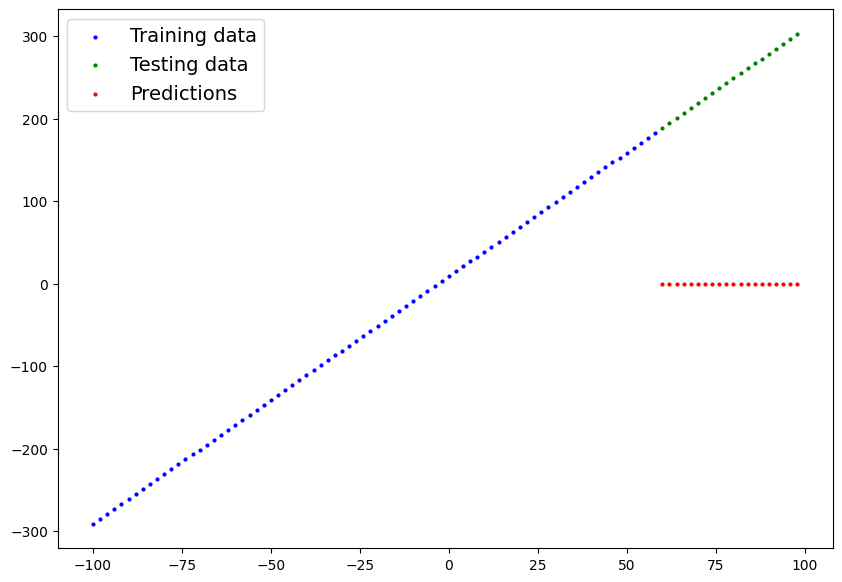

In [102]:
# Visualizing predictions on test data
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

Having 4 dense layers makes the model too complicated for this simple dataset, so it is overfitting compared to having a single dense layer.

### 3. Try and improve the results we got on the insurance dataset

Some things you might want to try to include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Look at the documentation of [Adam]("https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam") and find out what the first parameter is... what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [56]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [104]:
# Preprocess data to normalize and one-hot encode values
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns into values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [105]:
# Creating model with 4 dense layers
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_1.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13286.1797 - mae: 13286.1797
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13283.9336 - mae: 13283.9336
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13278.3545 - mae: 13278.3545
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13264.5859 - mae: 13264.5859
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13232.8730 - mae: 13232.8730
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13167.7158 - mae: 13167.7158
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13048.1191 - mae: 13048.1191
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12847.6025 - mae: 12847.6025
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12534.3438 - mae: 12534.3438
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12074.16

In [106]:
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3307.1262 - mae: 3307.1262


[3307.126220703125, 3307.126220703125]

In [107]:
# Creating model with more hidden units per layer
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_2.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13280.4326 - mae: 13280.4326
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13215.1836 - mae: 13215.1836
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12834.9785 - mae: 12834.9785
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11485.0039 - mae: 11485.0039
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9259.1758 - mae: 9259.1758
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8137.8784 - mae: 8137.8784
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7898.9805 - mae: 7898.9805
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7718.0645 - mae: 7718.0645
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7531.7881 - mae: 7531.7881
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 7325.2729 - mae: 7

In [108]:
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3292.5059 - mae: 3292.5059


[3292.505859375, 3292.505859375]

In [109]:
# Creating model with higher optimizer learning rate
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.01),
                          metrics=["mae"])

insurance_model_3.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13286.8359 - mae: 13286.8359
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13285.6699 - mae: 13285.6699
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13282.5723 - mae: 13282.5723
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 13273.0342 - mae: 13273.0342
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13247.4922 - mae: 13247.4922
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 13190.3320 - mae: 13190.3320
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 13080.1045 - mae: 13080.1045
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12889.8721 - mae: 12889.8721
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12587.2109 - mae: 12587.2109
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 12135.79

In [110]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3299.8406 - mae: 3299.8406


[3299.840576171875, 3299.840576171875]

In [112]:
# Training model for more epochs
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13287.9414 - mae: 13287.9414
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 13285.5312 - mae: 13285.5312
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 13281.1328 - mae: 13281.1328
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 13270.0654 - mae: 13270.0654
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 13244.1895 - mae: 13244.1895
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 13189.5361 - mae: 13189.5361
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 13084.8350 - mae: 13084.8350
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 12900.0469 - mae: 12900.0469
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 12600.4502 - mae: 12600.4502
Epoch 10/300
34/34 [==============================] - 0s 3ms/step - loss: 12148.74

In [113]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3301.4697 - mae: 3301.4697


[3301.4697265625, 3301.4697265625]

It seems like all 4 models had very similar evaluation metrics in the end. They all ended up with a MAE of around 3300 when evaluating the testing data, so it doesn't seem like adding more hidden units, changing the optimizer learning rate, or training for more epochs made much of a difference.

### 4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it

In [67]:
# Getting dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2)

57026/57026 [==============================] - 0s 0us/step


In [73]:
# Building model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

history = boston_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 80.0713 - mae: 80.0713
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 39.6741 - mae: 39.6741
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 14.6414 - mae: 14.6414
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 7.6519 - mae: 7.6519
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 6.6076 - mae: 6.6076
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 6.7689 - mae: 6.7689
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 6.0884 - mae: 6.0884
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.1807 - mae: 6.1807
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 6.0219 - mae: 6.0219
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 5.8621 - mae: 5.8621
Epoch 11/100
13/13 [==============================] -

In [74]:
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.6062 - mae: 4.6062


[4.606231689453125, 4.606231689453125]

Text(0.5, 0, 'Epochs')

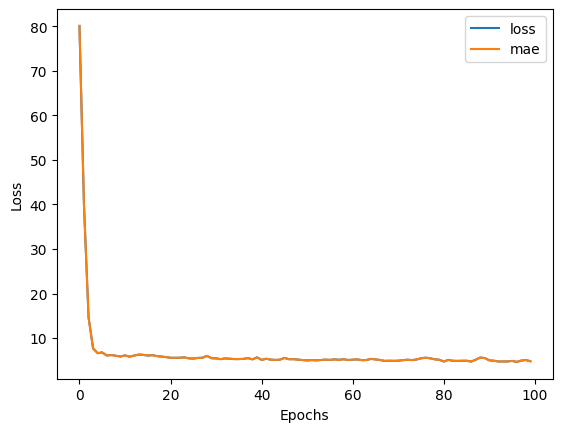

In [75]:
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

It seems that after ~5 epochs the loss stopped decreasing, so maybe there was no need to train the model for 100 epochs.